In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interp
import xarray as xr

In [3]:
fnam = "/Users/jackbassham/Downloads/NSIDC0051_SEAICE_PS_S25km_20200101_v2.0.nc"

with xr.open_dataset(fnam) as ds:
    print(ds)
    con = ds['F17_ICECON'].values
    x = ds['x'].values
    y = ds['y'].values
    t = ds['time']

<xarray.Dataset> Size: 425kB
Dimensions:     (x: 316, y: 332, time: 1)
Coordinates:
  * x           (x) float64 3kB -3.938e+06 -3.912e+06 ... 3.912e+06 3.938e+06
  * y           (y) float64 3kB 4.338e+06 4.312e+06 ... -3.912e+06 -3.938e+06
  * time        (time) datetime64[ns] 8B 2020-01-01
Data variables:
    crs         |S1 1B ...
    F17_ICECON  (time, y, x) float32 420kB ...
Attributes: (12/49)
    title:                     Sea Ice Concentrations from Nimbus-7 SMMR and ...
    summary:                   This data set is generated from brightness tem...
    id:                        10.5067/MPYG15WAA4WX
    license:                   Access Constraint: These data are freely, open...
    acknowledgment:            These data are produced by the NASA Cryospheri...
    metadata_link:             https://doi.org/10.5067/MPYG15WAA4WX
    ...                        ...
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east
    product_version:          

In [7]:
# Will need to int(*250) for land mask
print(int(np.max(con)*250))

254


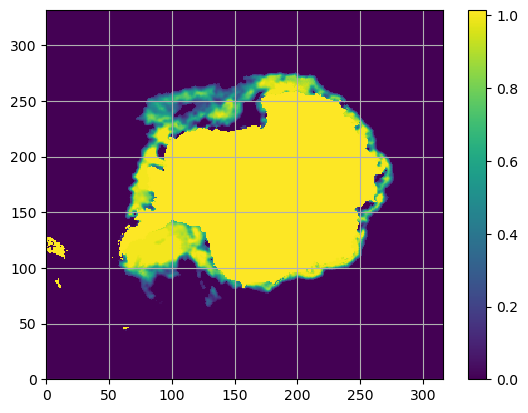

In [4]:
plt.pcolormesh(con[0,:,:])
plt.grid()
plt.colorbar()

In [5]:
# Load polar stereographic lat lon grid at 25km resolution
# https://daacdata.apps.nsidc.org/pub/DATASETS/nsidc0771_polarstereo_anc_grid_info/NSIDC0771_LatLon_PS_S25km_v1.0.nc

fnam_ps = "/Users/jackbassham/Downloads/NSIDC0771_LatLon_PS_S25km_v1.0.nc"

with xr.open_dataset(fnam_ps) as ps:
    print(ps)
    lat_ps = ps['latitude'].values
    lon_ps = ps['longitude'].values

<xarray.Dataset> Size: 2MB
Dimensions:    (x: 316, y: 332)
Coordinates:
  * x          (x) float64 3kB -3.938e+06 -3.912e+06 ... 3.912e+06 3.938e+06
  * y          (y) float64 3kB 4.338e+06 4.312e+06 ... -3.912e+06 -3.938e+06
Data variables:
    crs        int32 4B ...
    latitude   (y, x) float64 839kB ...
    longitude  (y, x) float64 839kB ...
Attributes: (12/38)
    title:                     Polar Stereo Ancillary Grid Information
    summary:                   This data set provides the total on-Earth surf...
    id:                        10.5067/N6INPBT8Y104
    metadata_link:             https://doi.org/10.5067/N6INPBT8Y104
    license:                   Access Constraint: These data are freely, open...
    acknowledgment:            These data are produced and supported by the N...
    ...                        ...
    geospatial_lat_max:        -39.23089
    geospatial_lon_min:        -180.0
    geospatial_lon_max:        180.0
    geospatial_lat_units:      degrees_north


In [6]:
# In bounds lat[-80 (S), -62 (S)], lon[-70 (W), 0]
i_minlat = np.where(lat_ps == -62)
print(f"i_minlat = {i_minlat}")

i_minlat = (array([], dtype=int64), array([], dtype=int64))


In [7]:
print(lat_ps[0:5])

[[-39.36486911 -39.49228444 -39.61938141 ... -39.61938141 -39.49228444
  -39.36486911]
 [-39.50529733 -39.6332616  -39.76090862 ... -39.76090862 -39.6332616
  -39.50529733]
 [-39.64551372 -39.77402885 -39.90222784 ... -39.90222784 -39.77402885
  -39.64551372]
 [-39.78551336 -39.91458122 -40.04333412 ... -40.04333412 -39.91458122
  -39.78551336]
 [-39.92529126 -40.05491373 -40.18422244 ... -40.18422244 -40.05491373
  -39.92529126]]


In [8]:
# Crop to Weddell Sea
# TODO: Get x, y from lat lon
# Define limits to crop lat lon box (Weddell Sea here) 
# In bounds lat[-80 (S), -62 (S)], lon[-70 (W), 0]
lon_lim = [-70, 1]
lat_lim = [-80, -63]

# Find indices for crop within limits
# [0] at end extracts 1D array index values
i_lat = np.unique(np.where((lat_ps >= lat_lim[0]) & (lat_ps <= lat_lim[1])))
i_lon = np.unique(np.where((lon_ps >= lon_lim[0]) & (lon_ps <= lon_lim[1])))

In [9]:
print(i_lat)
print(np.shape(i_lat))

[ 39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 28

In [10]:
print(i_lon)
print(np.shape(i_lon))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173]
(174,)


In [11]:
with xr.open_dataset(fnam) as ds:
    dscr = ds.isel(y=slice(39, 292), x=slice(0, 173))
    concr = dscr['F17_ICECON'].values
    xcr = dscr['x'].values
    ycr = dscr['y'].values
    tcr = dscr['time']

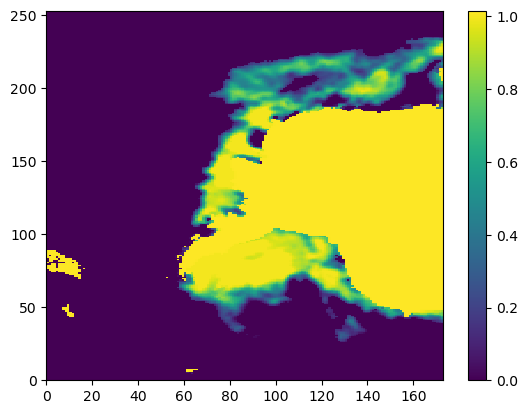

In [12]:
plt.pcolormesh(concr[0,:,:])
plt.colorbar()

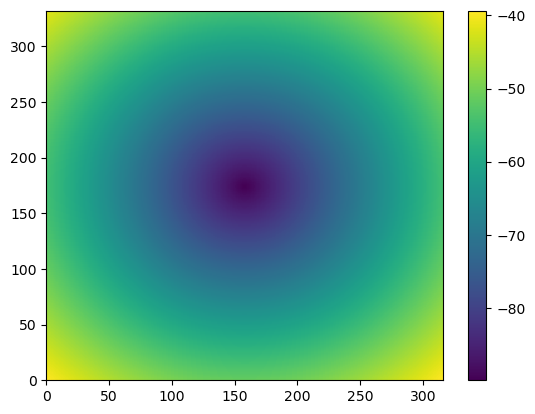

In [13]:
plt.pcolormesh(lat_ps)
plt.colorbar()
plt.show()

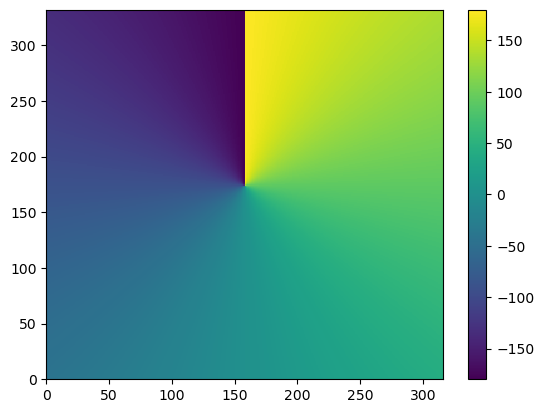

In [14]:
plt.pcolormesh(lon_ps)
plt.colorbar()
plt.show()

In [15]:
# Crop to Weddell Sea
# TODO: Get x, y from lat lon
# Define limits to crop lat lon box (Weddell Sea here) 
# In bounds lat[-80 (S), -62 (S)], lon[-70 (W), 0]
lon_lim = [-70, 1]
lat_lim = [-80, -63]

# Find indices for crop within limits
# [0] at end extracts 1D array index values
i_lat = np.unique(np.where((lon_ps >= lon_lim[0]) & (lon_ps <= lon_lim[1]))[0])
i_lon = np.unique(np.where((lat_ps >= lat_lim[0]) & (lat_ps <= lat_lim[1]))[0])

In [16]:
print(np.shape(lat_ps))
print(np.shape(lon_ps))
print(np.shape(x))
print(np.shape(y))
print(np.shape(con))

(332, 316)
(332, 316)
(316,)
(332,)
(1, 332, 316)


In [17]:
### DOESN'T WORK ###
# # Crop to Weddell Sea
# # TODO: Get x, y from lat lon
# # Define limits to crop lat lon box (Weddell Sea here) 
# # In bounds lat[-80 (S), -62 (S)], lon[-70 (W), 0]
# lon_lim = [-70, 1]
# lat_lim = [-80, -63]

# # Find indices for crop within limits
# # [0] at end extracts 1D array index values
# i_lat = np.unique(np.where((lat_ps >= lat_lim[0]) & (lat_ps <= lat_lim[1]))[0] + np.where((lat_ps >= lon_lim[0]) & (lat_ps <= lon_lim[1]))[0])
# j_lat = np.unique(np.where((lon_ps >= lat_lim[0]) & (lon_ps <= lat_lim[1]))[1])
# i_lon = np.unique(np.where((lat_ps >= lon_lim[0]) & (lat_ps <= lon_lim[1]))[0])
# j_lon = np.unique(np.where((lat_ps >= lon_lim[0]) & (lat_ps <= lon_lim[1]))[1])

In [18]:
with xr.open_dataset(fnam) as ds:
    dscr = ds.isel(y=slice(55, 292), x=slice(0, 156))
    concr = dscr['F17_ICECON'].values
    xcr = dscr['x'].values
    ycr = dscr['y'].values
    tcr = dscr['time']

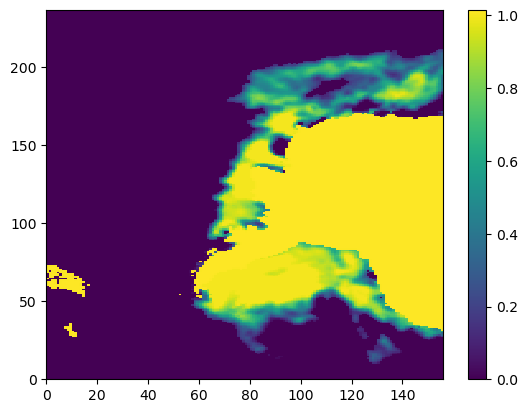

In [19]:
plt.pcolormesh(concr[0,:,:])
plt.colorbar()

In [20]:
### SUCCESSFUL CROP ### 
# TODO: Get x, y from lat lon
# Define limits to crop lat lon box (Weddell Sea here) 
# In bounds lat[-80 (S), -62 (S)], lon[-70 (W), 0]
lon_lim = [-70, 1]
lat_lim = [-80, -63]

# Find indices for crop within limits
# [0] at end extracts 1D array index values at [0]th dimension
i = np.unique(np.where((lat_ps >= lat_lim[0]) & (lat_ps <= lat_lim[1]) & (lon_ps >= lon_lim[0]) & (lon_ps <= lon_lim[1]))[0])
j = np.unique(np.where((lat_ps >= lat_lim[0]) & (lat_ps <= lat_lim[1]) & (lon_ps >= lon_lim[0]) & (lon_ps <= lon_lim[1]))[1])

In [21]:
print(i)

[ 55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158]


In [22]:
print(j)

[ 46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159]


In [23]:
with xr.open_dataset(fnam) as ds:
    dscr = ds.isel(y=j, x=i)
    concr = dscr['F17_ICECON'].values
    xcr = dscr['x'].values
    ycr = dscr['y'].values
    tcr = dscr['time']

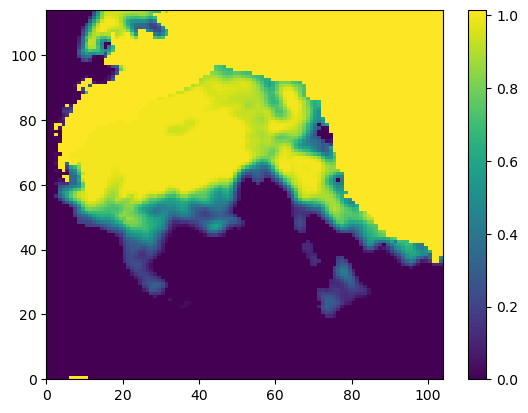

In [24]:
plt.pcolormesh(concr[0,:,:])
plt.colorbar()

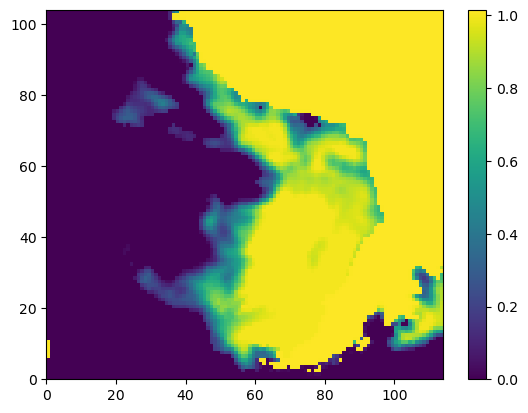

In [81]:
plt.pcolormesh(np.transpose(concr[0,:,:]))
plt.colorbar()

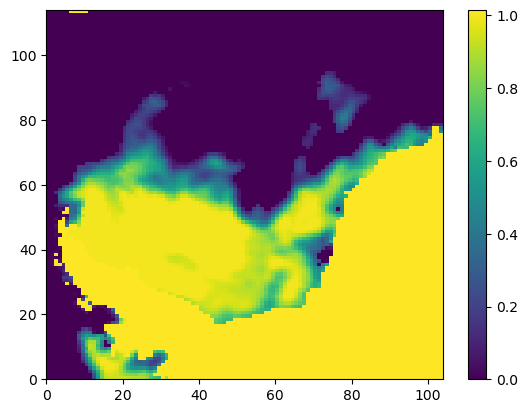

In [82]:
plt.pcolormesh(np.flipud(concr[0,:,:]))
plt.colorbar()

In [110]:
# Update ps lat lon grid to new bounds
with xr.open_dataset(fnam_ps) as ps:
    pscr = ps.isel(y=j, x=i)
    # lat_pscr = np.flipud(pscr['latitude'].values)
    lat_pscr = pscr['latitude'].values
    lon_pscr = pscr['longitude'].values

In [96]:
print(lat_pscr)
print(np.shape(lat_pscr))
print(lon_pscr)
print(np.shape(lon_pscr))

[[-66.43432938 -66.65372521 -66.8732451  ... -86.63680043 -86.65265599
  -86.65265599]
 [-66.40225612 -66.62131788 -66.84049746 ... -86.40737281 -86.42220916
  -86.42220916]
 [-66.36809792 -66.58680485 -66.80562303 ... -86.17783491 -86.19177459
  -86.19177459]
 ...
 [-53.80984488 -53.94188471 -54.0732355  ... -61.60756311 -61.60929535
  -61.60929535]
 [-53.64757498 -53.77886524 -53.90946542 ... -61.39027565 -61.3919926
  -61.3919926 ]
 [-53.48494253 -53.61548769 -53.74534182 ... -61.17319056 -61.17489245
  -61.17489245]]
(114, 104)
[[-38.7965521  -38.52254024 -38.24642596 ...  -0.6740369   -0.22468818
    0.22468818]
 [-39.0170435  -38.7425657  -38.4659615  ...  -0.67936476  -0.22646435
    0.22646435]
 [-39.23964936 -38.9647176  -38.68763525 ...  -0.68477751  -0.22826883
    0.22826883]
 ...
 [-80.85522835 -80.76667649 -80.67640822 ...  -5.19442891  -1.73570459
    1.73570459]
 [-81.40091129 -81.31747612 -81.23241876 ...  -5.52754015  -1.84761027
    1.84761027]
 [-81.94817052 -81.869

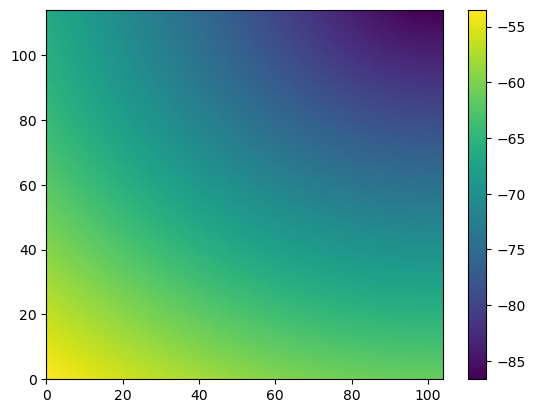

In [111]:
plt.pcolormesh(lat_pscr)
plt.colorbar()
plt.show()

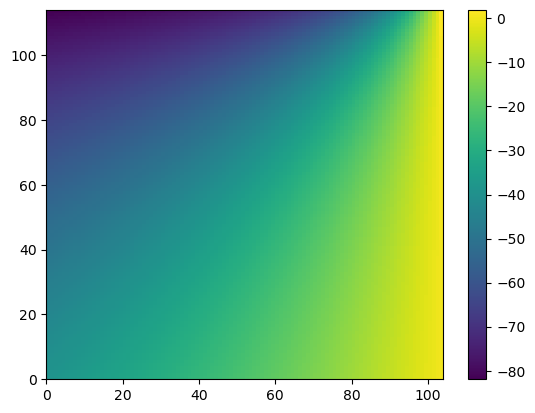

In [112]:
plt.pcolormesh(lon_pscr)
plt.colorbar()
plt.show()

In [98]:
### Regrid ### 
# Create new lat lon grid consistent with EASE2latlon.py 25km resolution
yres = 25/111
xres = 25/(111*np.cos(75)) # Based on average latitude for Weddell Sea

# Create arrays for lat and lon grid
# In bounds lat[-80 (S), -62 (S)], lon[-70 (W), 0] (taken maunally from map)
lat_ll = np.arange(-80, -62, yres)
lon_ll = np.arange(-70, 0, xres)

# Create gridded coordinate arrays for regular lat lon grid
Y_ll, X_ll = np.meshgrid(lat_ll, lon_ll)

(5086,)


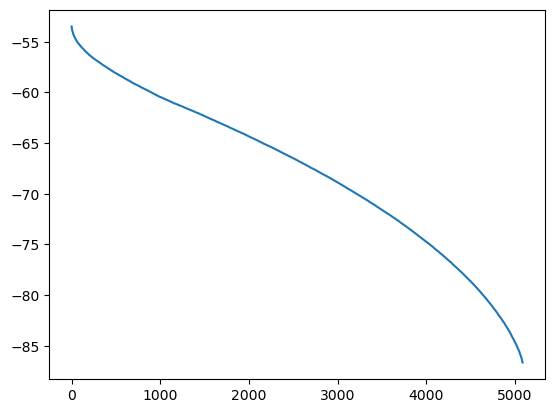

In [134]:
lat_ps = np.unique(lat_pscr.flatten())
lat_ps = sorted(lat_ps, reverse = True)
print(np.shape(lat_ps))
plt.plot(lat_ps)

[-81.94817052 -81.86989765 -81.79009856 ...   1.73570459   1.84761027
   1.97493401]
(9932,)


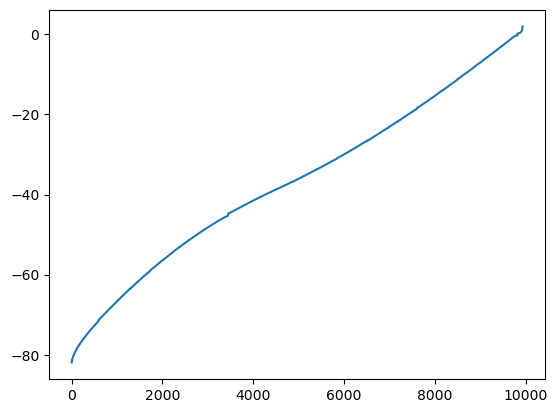

In [135]:
lon_ps = np.unique(lon_pscr.flatten())
print(lon_ps)
print(np.shape(lon_ps))
plt.plot(lon_ps)

In [136]:
# Create gridded coordinate arrays for lat lon
Y_ps, X_ps = np.meshgrid(lat_ps, lon_ps)

In [137]:
print(np.shape(Y_ll))
print(np.shape(X_ll))
print(np.shape(lat_ll))
print(np.shape(lon_ll))
print(np.shape(Y_ps))
print(np.shape(X_ps))
print(np.shape(lat_ps))
print(np.shape(lon_ps))
print(np.shape(concr[0,:,:]))

(287, 80)
(287, 80)
(80,)
(287,)
(9932, 5086)
(9932, 5086)
(5086,)
(9932,)
(114, 104)


In [138]:
[ny, nx] = np.shape(concr[0,:,:])
con_ll1 = np.zeros((ny, nx))

In [139]:
print(np.shape(np.transpose(concr[0,:,:]).flatten()))
print(np.shape(X_ps.flatten()))
print(np.shape(Y_ps.flatten()))

(11856,)
(50514152,)
(50514152,)


In [141]:
# Interpolate u10m and v10m to new grids using nearest neighbor method
concr_ud = np.flipud(concr[0,:,:])

con_ll1 = np.transpose(interp.griddata(Y_ps, np.transpose(concr_ud[:,:]).flatten(),(Y_ll,X_ll),method='nearest'))

ValueError: different number of values and points

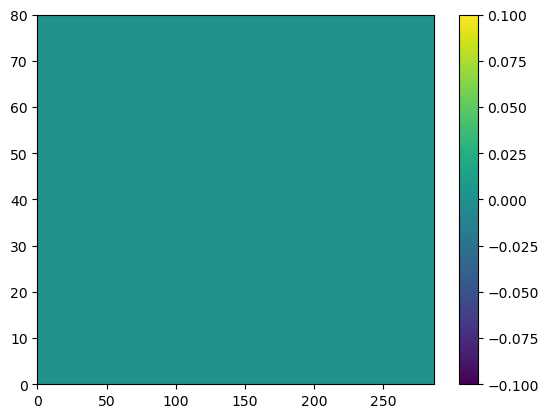

In [85]:
plt.pcolormesh(con_ll)
plt.colorbar()
plt.show()

In [127]:
conc_ll_0 = np.zeros((len(lat_ll), len(lon_ll)))

# Iterate through each new lon and lat grid point
for i in range(len(lon_ll)):
    for j in range(len(lat_ll)):

        # Find absolute value distances of j'th lat from entire lat_ease array and store in array
        dy = (lat_ll[j]-lat_pscr)**2

        # Find absolute value distances of i'th lat from entire lat_ease array and store in array  
        dx = (lon_ll[i]-lon_pscr)**2
        
        # Find distances (we don't need sqrt here b/c not using actual value, just minimum)
        ds = dx + dy
        

        # Find indices of minimum ds value
        i_neighbors = np.where(ds == np.min(ds))

        # NOTE previous bug was from indexing ii from i_neighbors[0], which is jj here
        jj = np.min(i_neighbors[0])
        ii = np.min(i_neighbors[1])
        
        # Find interpolated East component by applying rotation: E: u * cos L  -  v * sin L (L is lon)
        conc_ll_0[j, i] = concr[0, jj, ii]

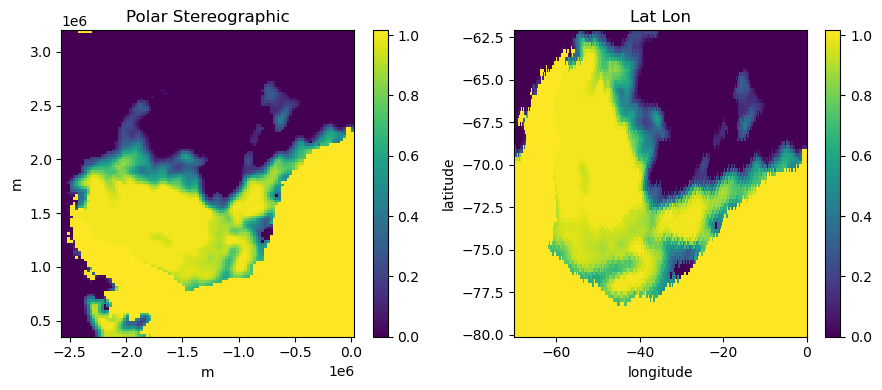

In [133]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9,4))

# Plot polar stereographic
psplt = axs[0].pcolormesh(xcr, ycr, concr[0,:,:])
axs[0].set_title('Polar Stereographic')
axs[0].set_xlabel('m')
axs[0].set_ylabel('m')
# axs[0].grid()
pscbar = fig.colorbar(psplt, ax=axs[0])

# Plot lat lon
llplt = axs[1].pcolormesh(lon_ll, lat_ll, (conc_ll_0[:,:]))
axs[1].set_title('Lat Lon')
axs[1].set_xlabel('longitude')
axs[1].set_ylabel('latitude')
# axs[1].grid()
llcbar = fig.colorbar(llplt, ax=axs[1])

# Create spacing with tight layout
fig.tight_layout()

plt.show()

In [ ]:
###Download Example###

# List of filenames representing your datasets
file_list = ['dataset1.nc', 'dataset2.nc', 'dataset3.nc']

# Loop through each dataset
for file in file_list:
    # Open the dataset
    ds = xr.open_dataset(file)
    
    # Access the variables using different names
    # For example, if temperature variables have different names
    if 'temperature' in ds:
        temp_variable = ds['temperature']  # Access the temperature variable
    elif 'temp' in ds:
        temp_variable = ds['temp']  # Access the temperature variable
    else:
        # Handle the case if the variable name is not found
        print("Temperature variable not found in", file)
        continue
    
    # Perform operations with the variable
    # For example, print the first few values
    print(temp_variable.values)
    
    # Close the dataset
    ds.close()

In [ ]:
### DOWNLOAD EXAMPLE ###

import xarray as xr

# List of filenames representing your datasets
file_list = ['dataset1.nc', 'dataset2.nc', 'dataset3.nc']

# Variable names to search for
variable_names = ['temperature', 'temp']

# Loop through each dataset
for file in file_list:
    # Open the dataset
    ds = xr.open_dataset(file)
    
    # Access the temperature variable
    temp_variable = None
    for var_name in variable_names:
        temp_variable = ds.get(var_name)
        if temp_variable is not None:
            break
    
    # Check if the temperature variable is found
    if temp_variable is None:
        print("Temperature variable not found in", file)
        ds.close()
        continue